# Hypothesis Testing with Insurance Data
- Clint Atterberry
- 9/6/22

We have been asked to use our hypothesis testing skills to answer the following questions:

1. Do smokers have higher insurance charges than non-smokers?
2. Are men more likely to smoke than women?
3. Do different regions have different charges, on average?



For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

# Setup

## Import and Clean Data

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Importing the OS and JSON Modules
import os,json

In [2]:
# load in insurance.csv
df = pd.read_csv('Data/insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [3]:
# exploring dataframe
df.info()

#  all column names appear appropriate
# no missing values
# 7 columns, 1338 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# check for duplicated data
df.duplicated().sum()

# 1 duplicate

1

In [5]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

# success!

0

In [6]:
# explore numeric columns
df.describe()

# numeric data appears appropriate

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# explore object columns
df.select_dtypes('object').groupby('sex').value_counts()

# object data appears appropriate

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
                northeast    132
        yes     southeast     36
                northeast     29
                northwest     29
                southwest     21
male    no      southeast    134
                northwest    131
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
                northwest     29
dtype: int64

# Transform Data

In [8]:
# copy of df
ins_df = df.copy()

## OHE Gender

In [9]:
# reference
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# males 1
mask = ins_df['sex'].str.startswith('m')
ins_df.loc[mask,('male','female')] = [1,0]

# females 1
mask = ins_df['sex'].str.startswith('f')
ins_df.loc[mask,('male','female')] = [0,1]

# drop 'sex'
ins_df.drop(columns='sex', inplace=True)
ins_df.head()

,age,bmi,children,smoker,region,charges,male,female
0,19,27.900,0,yes,southwest,16884.92400,0.0,1.0
1,18,33.770,1,no,southeast,1725.55230,1.0,0.0
2,28,33.000,3,no,southeast,4449.46200,1.0,0.0
3,33,22.705,0,no,northwest,21984.47061,1.0,0.0
4,32,28.880,0,no,northwest,3866.85520,1.0,0.0


## OHE Smoker

In [10]:
# reference
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# smoker 1
mask = ins_df['smoker'].str.startswith('y')
ins_df.loc[mask,('smoke_yes','smoke_no')] = [1,0]

# non-smoker 1
mask = ins_df['smoker'].str.startswith('n')
ins_df.loc[mask,('smoke_yes','smoke_no')] = [0,1]

# drop 'smoker'
ins_df.drop(columns='smoker', inplace=True)
ins_df.head()

,age,bmi,children,region,charges,male,female,smoke_yes,smoke_no
0,19,27.900,0,southwest,16884.92400,0.0,1.0,1.0,0.0
1,18,33.770,1,southeast,1725.55230,1.0,0.0,0.0,1.0
2,28,33.000,3,southeast,4449.46200,1.0,0.0,0.0,1.0
3,33,22.705,0,northwest,21984.47061,1.0,0.0,0.0,1.0
4,32,28.880,0,northwest,3866.85520,1.0,0.0,0.0,1.0


## OHE Region

In [11]:
# reference
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# southwest 1
mask = ins_df['region'].str.startswith('southw')
ins_df.loc[mask,('sw','se','nw','ne')] = [1,0,0,0]

# southeast 1
mask = ins_df['region'].str.startswith('southe')
ins_df.loc[mask,('sw','se','nw','ne')] = [0,1,0,0]

# northwest 1
mask = ins_df['region'].str.startswith('northe')
ins_df.loc[mask,('sw','se','nw','ne')] = [0,0,1,0]

# northeast 1
mask = ins_df['region'].str.startswith('northw')
ins_df.loc[mask,('sw','se','nw','ne')] = [0,0,0,1]

# drop 'region'
ins_df.drop(columns='region', inplace=True)
ins_df.head()

,age,bmi,children,charges,male,female,smoke_yes,smoke_no,sw,se,nw,ne
0,19,27.900,0,16884.92400,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
# verify dtypes
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   bmi        1337 non-null   float64
 2   children   1337 non-null   int64  
 3   charges    1337 non-null   float64
 4   male       1337 non-null   float64
 5   female     1337 non-null   float64
 6   smoke_yes  1337 non-null   float64
 7   smoke_no   1337 non-null   float64
 8   sw         1337 non-null   float64
 9   se         1337 non-null   float64
 10  nw         1337 non-null   float64
 11  ne         1337 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 135.8 KB


# Smokers vs Non-smokers

## Hypotheses

\begin{align*}
   H_0 & : \text{Smokers and Non-smokers have the same insurance charges.}
   \\
   H_A & : \text{Smokers have higher insurance charges than non-smokers.}
\end{align*}

## Method of Testing

There are 2 numerical samples that are being compared:
- smokers' insurance charges
- non-smokers' insurance charges

A 2 Sample T-test would be more appropriate at this time.

## Testing Assumptions

Assumptions:
- No significant outliers
- Normality
- Equal Variance

In [13]:
# filter df for smokers
sm = ins_df[ins_df['smoke_yes']==1]
sm

# select just the charges column
sm_chrg = sm['charges']
sm_chrg

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [14]:
sm_chrg.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

### Outliers

In [15]:
# outliers
print(f"3 sd below the mean: {sm_chrg.mean() - 3 * sm_chrg.std()}")
print(f"3 sd above the mean: {sm_chrg.mean() + 3 * sm_chrg.std()}")

# There are no values above or below 3 standard deviations from the mean

3 sd below the mean: -2574.4096952345244
3 sd above the mean: 66674.8733583002


In [16]:
# filter df for non-smokers
non_sm = ins_df[ins_df['smoke_no']==1]
non_sm

# select just the charges column
non_sm_chrg = non_sm['charges']
non_sm_chrg

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64

In [17]:
non_sm_chrg.describe()

count     1063.000000
mean      8440.660307
std       5992.973800
min       1121.873900
25%       3988.883500
50%       7345.726600
75%      11363.019100
max      36910.608030
Name: charges, dtype: float64

In [18]:
# outliers
print(f"3 sd below the mean: {non_sm_chrg.mean() - 3 * non_sm_chrg.std()}")
print(f"3 sd above the mean: {non_sm_chrg.mean() + 3 * non_sm_chrg.std()}")

# There are at least 1 values above 3 standard deviations from the mean, but none below

3 sd below the mean: -9538.261093810637
3 sd above the mean: 26419.58170682851


In [19]:
# find out how many outliers there are above 3 sd
upper = non_sm_chrg.mean() + 3 * non_sm_chrg.std()

outliers = non_sm_chrg[non_sm_chrg > upper].count()
outliers

# There are 24

24

In [20]:
# removing outliers
non_sm_chrg = non_sm_chrg[non_sm_chrg < upper]

# review
outliers = non_sm_chrg[non_sm_chrg > upper].count()
outliers

# success!

0

### Normality

In [21]:
# normality

# concat both data frames
frames = sm_chrg,non_sm_chrg
data = pd.concat(frames, ignore_index=True, copy=False)
data.describe()

count     1313.000000
mean     12976.069488
std      12002.673347
min       1121.873900
25%       4686.388700
50%       9222.402600
75%      15359.104500
max      63770.428010
Name: charges, dtype: float64

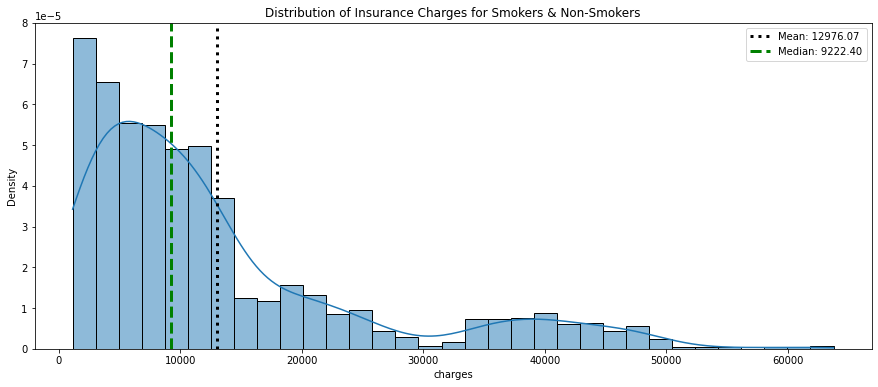

In [22]:
## Slice out data and calc stats
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Insurance Charges for Smokers & Non-Smokers')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

The graphs is skewed right; therefore, the data is not normal.

In [23]:
# run D’Agostino and Pearson’s Normality Test to verify
result = stats.normaltest(data)
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=364.58295195722803, pvalue=6.789188774775914e-80)


True

The Null Hypothesis for the previous test is that the data is normal. Since the test resulted in a p-value extremely below the alpha, we can reject the Null Hypothesis and determine that the data is **NOT normal**.

Although the data is not normal, we can safely ignore the normality assumption since both groups are greater than 15.

### Equal Variance

In [24]:
# using a Levene's Test to test for equal variance
stats.levene(sm_chrg,non_sm_chrg)

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

The test results show that the data does not have equal variance. Instead of a 2-Sample T-test, I will perform a T-Test with 'equal_val=False'.

## Execute Test

In [25]:
# T-test with equal_var=False
stats.ttest_ind(sm_chrg,non_sm_chrg, equal_var=False)

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

## Interpret P-value

$2.728\times10^{-104}$

That is an extremely small p-value. This is far below the alpha of 0.05; therefore, we should reject the null hypothesis that the insurance charges are the same between smokers and non-smokers.

## Visualization

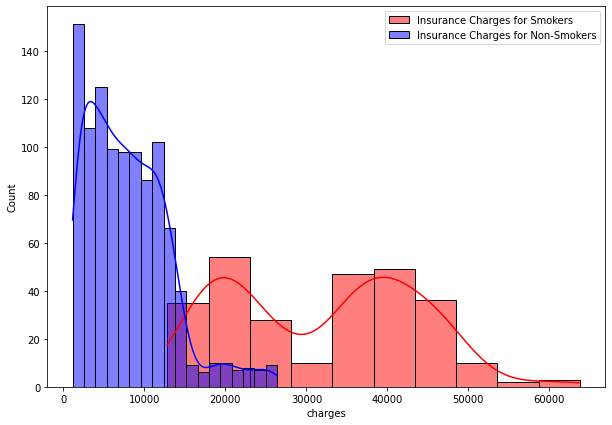

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

sns.histplot(sm_chrg, kde=True, label="Insurance Charges for Smokers", color="red")
sns.histplot(non_sm_chrg, kde=True, label="Insurance Charges for Non-Smokers", color="blue")

plt.legend();

It is very clear in the visualization that non-smokers are spend less for insurance charges.

# Men vs Women

## Hypotheses

\begin{align*}
   H_0 & : \text{There is no difference in the proportion of men and women who smoke.}
   \\
   H_A & : \text{A higher proportion of men smoke than women.}
\end{align*}

## Method of Testing

There are 2 categorical samples that are being compared:
- men who smoke
- women who smoke

A Chi-Square test would be most appropriate here.

## Testing Assumptions

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

### Variables

There are two categorical variables, "yes" and "no", coded as 1 and 0 respectively.

### Independent Outcomes

To the best of our knowledge, we assume the outcomes are independent of each other in this dataset.

## Execute Test

In [27]:
# preview results of males and females
male = ins_df[ins_df['male'] == 1]
male_sm = male['smoke_yes']

female = ins_df[ins_df['female'] == 1]
female_sm = female['smoke_yes']

print(f"The percentage of males that smoke: {male_sm.mean().round(4)*100}%")
print(f"The percentage of females that smoke: {female_sm.mean().round(4)*100}%")

The percentage of males that smoke: 23.56%
The percentage of females that smoke: 17.37%


In [28]:
# create contingency table of 'sex' and 'smoker'
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [29]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [30]:
# What was our P-value?
print(p.round(4))
p<.05

0.0063


True

## Interpret P-value

The P-value is well below our alpha; therefore, we should reject the null hypothesis. The data suggests that males smoke more than females.

## Visualization

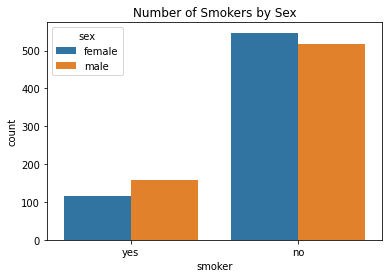

In [31]:
# countplot of smokers by sex
ax = sns.countplot(data=df, x='smoker',hue='sex',)
ax.set_title("Number of Smokers by Sex");

From this barplot, it appears that males smoke slightly more than females.

# Region Charges

## Hypotheses

\begin{align*}
   H_0 & : \text{On average, all regions have the same charges.}
   \\
   H_A & : \text{On average, all regions do not have the same charges.}
\end{align*}

## Method of Testing

There are more than 2 numerical samples that are being compared:
- southwest insurance charges
- southeast insurance charges
- northwest insurance charges
- northeast insurance charges

An ANOVA and/or Tukey test would be most appropriate here.

## Testing Assumptions

- No significant outliers
- Equal variance
- Normality

### Outliers

In [32]:
# southwest
sw = ins_df[ins_df['sw']==1]
sw_chrg = sw['charges']

print(f"Min: {sw_chrg.min()}")
print(f"Max: {sw_chrg.max()}")

# southwest region outliers
print(f"3 sd below the mean: {sw_chrg.mean() - 3 * sw_chrg.std()}")
print(f"3 sd above the mean: {sw_chrg.mean() + 3 * sw_chrg.std()}")

# There are values above 3 standard deviations from the mean

Min: 1241.565
Max: 52590.82939
3 sd below the mean: -22324.59992495404
3 sd above the mean: 47018.47467953865


In [33]:
# find out how many outliers there are above 3 sd
upper = sw_chrg.mean() + 3 * sw_chrg.std()

outliers = sw_chrg[sw_chrg > upper].count()
outliers

# There are 8

8

In [34]:
# removing outliers
sw_chrg = sw_chrg[sw_chrg < upper]

# review
outliers = sw_chrg[sw_chrg > upper].count()
outliers

# success!

0

In [35]:
# southeast
se = ins_df[ins_df['se']==1]
se_chrg = se['charges']

print(f"Min: {se_chrg.min()}")
print(f"Max: {se_chrg.max()}")

# southeast region outliers
print(f"3 sd below the mean: {se_chrg.mean() - 3 * se_chrg.std()}")
print(f"3 sd above the mean: {se_chrg.mean() + 3 * se_chrg.std()}")

# There are no values above or below 3 standard deviations from the mean

Min: 1121.8739
Max: 63770.42801
3 sd below the mean: -27177.884329365348
3 sd above the mean: 56648.707204585124


In [36]:
# northwest
nw = ins_df[ins_df['nw']==1]
nw_chrg = nw['charges']

print(f"Min: {nw_chrg.min()}")
print(f"Max: {nw_chrg.max()}")

# northwest region outliers
print(f"3 sd below the mean: {nw_chrg.mean() - 3 * nw_chrg.std()}")
print(f"3 sd above the mean: {nw_chrg.mean() + 3 * nw_chrg.std()}")

# There are no values above or below 3 standard deviations from the mean

Min: 1694.7964
Max: 58571.07448
3 sd below the mean: -20361.024680349583
3 sd above the mean: 47173.793713121195


In [37]:
# northeast
ne = ins_df[ins_df['ne']==1]
ne_chrg = ne['charges']

print(f"Min: {ne_chrg.min()}")
print(f"Max: {ne_chrg.max()}")

# northeast region outliers
print(f"3 sd below the mean: {ne_chrg.mean() - 3 * ne_chrg.std()}")
print(f"3 sd above the mean: {ne_chrg.mean() + 3 * ne_chrg.std()}")

# There are no values above or below 3 standard deviations from the mean

Min: 1621.3402
Max: 60021.39897
3 sd below the mean: -20768.536252981416
3 sd above the mean: 45670.21794088265


### Normality

In [38]:
# normality

# concat both data frames
frames = sw_chrg,se_chrg,nw_chrg,ne_chrg
data = pd.concat(frames, ignore_index=True, copy=False)
data.describe()

count     1329.000000
mean     13065.066936
std      11826.247154
min       1121.873900
25%       4719.736550
50%       9301.893550
75%      16297.846000
max      63770.428010
Name: charges, dtype: float64

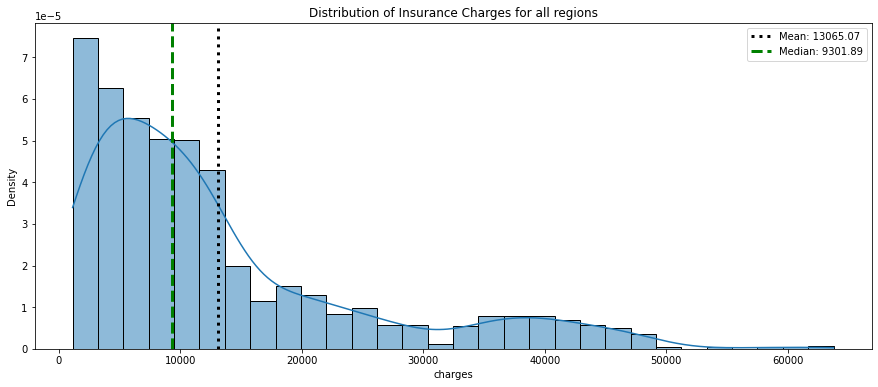

In [39]:
## Slice out data and calc stats
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Insurance Charges for all regions')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

The graphs is skewed right; therefore, the data is not normal.

In [40]:
# run D’Agostino and Pearson’s Normality Test to verify
result = stats.normaltest(data)
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=340.61656322575084, pvalue=1.086558398738381e-74)


True

The Null Hypothesis for the previous test is that the data is normal. Since the test resulted in a p-value extremely below the alpha, we can reject the Null Hypothesis and determine that the data is **NOT normal**.

Although the data is not normal, we can safely ignore the normality assumption since both groups are greater than 15.

### Equal Variance

In [41]:
# using a Levene's Test to test for equal variance
stats.levene(sw_chrg,se_chrg,nw_chrg,ne_chrg)

LeveneResult(statistic=7.98709204110489, pvalue=2.8086239933922955e-05)

The test results show that the data does not have equal variance. Instead of a 2-Sample T-test, I will perform a T-Test with 'equal_val=False'.

## Execute Test

In [42]:
# running Kruskal-Wallis test because the data set does not have equal variance
# this is an alternate to the ANOVA test
# I chose this because this test is based on the median
# the median is a better choice than the mean when data is skewed

stats.kruskal(sw_chrg,se_chrg,nw_chrg,ne_chrg)

KruskalResult(statistic=7.2919270316497204, pvalue=0.06315279816356219)

## Interpret P-value

The P-value is well above our alpha; therefore, we fail to reject the null hypothesis. The data does not suggests that there is a difference in charges across the four regions.

## Visualization

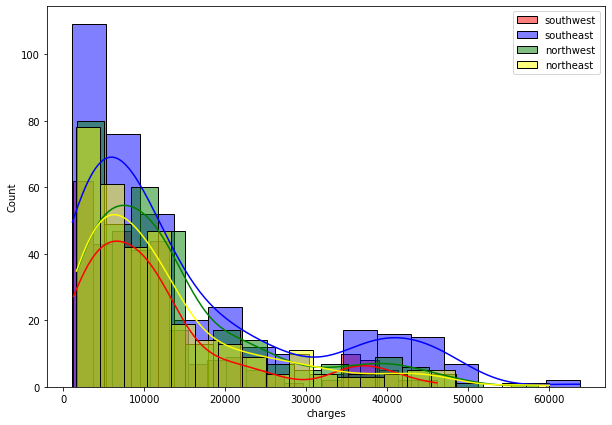

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

sns.histplot(sw_chrg, kde=True, label="southwest", color="red")
sns.histplot(se_chrg, kde=True, label="southeast", color="blue")
sns.histplot(nw_chrg, kde=True, label="northwest", color="green")
sns.histplot(ne_chrg, kde=True, label="northeast", color="yellow")

plt.legend();

From these graphs layered on each other, there is a lot of similarities in features. They are all skewed right. They all have maxes in the 5000-6000 range. They also have a local max around 4000.